#Problem Statement: The project will analyze energy usage and greenhouse gas (GHG) emissions of Ontario's Broader Public Sector (BPS) organizations, leveraging a comprehensive database of reported data. We aim to identify trends, assess conservation effectiveness, and pinpoint areas for improvement, informing data-driven strategies to achieve climate change mitigation goals within the BPS.

##PART-2

In [ ]:
# import all the required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the raw dataset wit noise
df = pd.read_excel('2021_final_bps_dataset.xlsx')
df.head()

,Sector,Subsector,Organization,Property Name,Primary Property Type - Self Selected,Portfolio Manager Property ID,Portfolio Manager Parent Property ID,Parent Property Name,Year Ending,Address,...,Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²),Drinking Water Treatment & Distribution - Average Flow (m³PD),Wastewater Treatment Plant - Average Influent Flow (m³PD),Address 2,List of All Property Use Types (GFA) (m²),Largest Property Use Type,Report Submission Date,Calculated with new source factors (Yes/No),Data Quality Checker Run?,Data Quality Checker - Date Run
0,Municipal,Municipality,The Corporation of the City of Markham,Fire Station #91,Fire Station,3634451,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,7801 Bayview Avenue,...,50.5,Not Available,Not Available,Not Available,Fire Station (775.6),Fire Station,2023-06-26 10:23:22,No,No,Not Available
1,Municipal,Municipality,The Corporation of the City of Markham,Fire Station #92,Fire Station,3634452,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,10 Riviera Dr,...,51.2,Not Available,Not Available,Not Available,Fire Station (1431.5),Fire Station,2023-06-26 10:23:22,No,No,Not Available
2,Municipal,Municipality,The Corporation of the City of Markham,Fire Station #93,Fire Station,3634453,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,2930 MAJOR MACKENZIE DR E,...,8.2,Not Available,Not Available,Not Available,Fire Station (1006.5),Fire Station,2023-06-26 10:23:22,No,No,Not Available
3,Municipal,Municipality,The Corporation of the City of Markham,Fire Station #94,Fire Station,3634454,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,7300 Birchmount,...,52.4,Not Available,Not Available,Not Available,Fire Station (663.5),Fire Station,2023-06-26 10:23:22,No,No,Not Available
4,Municipal,Municipality,The Corporation of the City of Markham,Fire Station #95,Fire Station,3634455,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,316 Main Street,...,55.8,Not Available,Not Available,Not Available,Fire Station (1100.5),Fire Station,2023-06-26 10:23:22,No,No,Not Available


In [3]:
#check the names of all the features
df.columns

Index(['Sector', 'Subsector', 'Organization', 'Property Name',
       'Primary Property Type - Self Selected',
       'Portfolio Manager Property ID', 'Portfolio Manager Parent Property ID',
       'Parent Property Name', 'Year Ending', 'Address', 'City', 'Postal Code',
       'Property GFA - Self-Reported (m²)', 'Number of Buildings',
       'Custom Property ID 1 - Name', 'Custom Property ID 1 - Value',
       'Custom Property ID 2 - Name', 'Custom Property ID 2 - Value',
       'Custom Property ID 3 - Name', 'Custom Property ID 3 - Value',
       'Electricity Use - Grid Purchase (kWh)',
       'Electricity Use - Grid Purchase (GJ)', 'Natural Gas Use (therms)',
       'Natural Gas Use (GJ)', 'Fuel Oil #1 Use (GJ)', 'Fuel Oil #2 Use (GJ)',
       'Fuel Oil #4 Use (GJ)', 'Fuel Oil #5 & 6 Use (GJ)',
       'Diesel #2 Use (GJ)', 'Kerosene Use (GJ)', 'Propane Use (GJ)',
       'District Steam Use (GJ)', 'District Hot Water Use (GJ)',
       'District Chilled Water Use (GJ)', 'Wood Use (GJ)

In [4]:
# check the size of the data
df.shape

(15232, 58)

In [5]:
#check the datatype of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15232 entries, 0 to 15231
Data columns (total 58 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Sector                                                         15232 non-null  object        
 1   Subsector                                                      15232 non-null  object        
 2   Organization                                                   15232 non-null  object        
 3   Property Name                                                  15232 non-null  object        
 4   Primary Property Type - Self Selected                          15232 non-null  object        
 5   Portfolio Manager Property ID                                  15232 non-null  int64         
 6   Portfolio Manager Parent Property ID                           15232 non-null  object        


In [6]:
#lets drop columns that are not useful for analysis

columns_to_drop = ['Portfolio Manager Property ID','Portfolio Manager Parent Property ID','Custom Property ID 1 - Name','Custom Property ID 1 - Value',
                  'Custom Property ID 2 - Name','Custom Property ID 2 - Value','Custom Property ID 3 - Name','Custom Property ID 3 - Value',
                  'Report Submission Date','Data Quality Checker Run?','Data Quality Checker - Date Run','Calculated with new source factors (Yes/No)',
                  'Postal Code','Address 2','Address']
df_1 = df.drop(columns=columns_to_drop, axis=1)

In [7]:
df_1.head(3)

,Sector,Subsector,Organization,Property Name,Primary Property Type - Self Selected,Parent Property Name,Year Ending,City,Property GFA - Self-Reported (m²),Number of Buildings,...,Weather Normalized Site EUI (GJ/m²),Weather Normalized Site EUI (ekWh/sqft),Weather Normalized Source EUI (GJ/m²),Weather Normalized Source EUI (ekWh/sqft),Total (Location-Based) GHG Emissions (Metric Tons CO2e),Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²),Drinking Water Treatment & Distribution - Average Flow (m³PD),Wastewater Treatment Plant - Average Influent Flow (m³PD),List of All Property Use Types (GFA) (m²),Largest Property Use Type
0,Municipal,Municipality,The Corporation of the City of Markham,Fire Station #91,Fire Station,Not Applicable: Standalone Property,2021-12-31,Thornhill,775.6,1,...,1.58,40.774194,2.11,54.451613,39.2,50.5,Not Available,Not Available,Fire Station (775.6),Fire Station
1,Municipal,Municipality,The Corporation of the City of Markham,Fire Station #92,Fire Station,Not Applicable: Standalone Property,2021-12-31,Markham,1431.5,1,...,1.64,42.322581,2.24,57.806452,73.3,51.2,Not Available,Not Available,Fire Station (1431.5),Fire Station
2,Municipal,Municipality,The Corporation of the City of Markham,Fire Station #93,Fire Station,Not Applicable: Standalone Property,2021-12-31,Markham,1006.5,1,...,0.65,16.774194,1.21,31.225806,8.2,8.2,Not Available,Not Available,Fire Station (1006.5),Fire Station


In [9]:
# find unique values for all the columns
unique_counts = df_1.nunique()
unique_counts_dataframe = pd.DataFrame({'Column': unique_counts.index, 'unique_values': unique_counts.values})
unique_counts_dataframe

,Column,unique_values
0,Sector,4
1,Subsector,8
2,Organization,457
3,Property Name,14238
4,Primary Property Type - Self Selected,58
5,Parent Property Name,10
6,Year Ending,2
7,City,1205
8,Property GFA - Self-Reported (m²),9472
9,Number of Buildings,20


In [10]:
# replace Not Available with NaN for missing values
df_1.replace('Not Available', np.nan, inplace=True)

In [11]:
#check for the null values int he dataset
df_1.isnull().sum()

Sector                                                               0
Subsector                                                            0
Organization                                                         0
Property Name                                                        0
Primary Property Type - Self Selected                                0
Parent Property Name                                                 0
Year Ending                                                          0
City                                                                 0
Property GFA - Self-Reported (m²)                                    0
Number of Buildings                                                  0
Electricity Use - Grid Purchase (kWh)                             1641
Electricity Use - Grid Purchase (GJ)                              1641
Natural Gas Use (therms)                                          5821
Natural Gas Use (GJ)                                              5821
Fuel O

In [12]:
# As we can see there are many fuel oil use columns and more the 97% of rows in each fuel column is empty. lets combine all fuel column into one
# drop Kerosene use column as it is empty
# this method is also called feature engineering

fuel_oil_columns = ['Fuel Oil #1 Use (GJ)','Fuel Oil #2 Use (GJ)','Fuel Oil #4 Use (GJ)','Fuel Oil #5 & 6 Use (GJ)'] 
df_1[fuel_oil_columns] = df_1[fuel_oil_columns].apply(pd.to_numeric, errors='coerce')
df_1[fuel_oil_columns] = df_1[fuel_oil_columns].fillna(0)

In [13]:
df_1['Total fuel Oil Use (GJ)'] = df_1[fuel_oil_columns].sum(axis=1)

In [14]:
# drop unuseful column
columns_to_drop = fuel_oil_columns + ['Kerosene Use (GJ)']
df_1.drop(columns=columns_to_drop, inplace=True)

In [15]:
df_1.shape

(15232, 39)

In [16]:
df_1.isnull().sum()

Sector                                                               0
Subsector                                                            0
Organization                                                         0
Property Name                                                        0
Primary Property Type - Self Selected                                0
Parent Property Name                                                 0
Year Ending                                                          0
City                                                                 0
Property GFA - Self-Reported (m²)                                    0
Number of Buildings                                                  0
Electricity Use - Grid Purchase (kWh)                             1641
Electricity Use - Grid Purchase (GJ)                              1641
Natural Gas Use (therms)                                          5821
Natural Gas Use (GJ)                                              5821
Diesel

# Approach-1 
since there are still huge number of null values. lets drop column having 90% empty value

In [17]:
# lets drop column that has more than 95% empty data
almost_empty_columns = ['Diesel #2 Use (GJ)','Propane Use (GJ)','District Steam Use (GJ)','District Hot Water Use (GJ)','District Chilled Water Use (GJ)',
                       'Wood Use (GJ)','Weather Normalized Site Energy Use (GJ)','Weather Normalized Source Energy Use (GJ)','Weather Normalized Site EUI (GJ/m²)',
                       'Weather Normalized Site EUI (ekWh/sqft)','Weather Normalized Source EUI (GJ/m²)','Weather Normalized Source EUI (ekWh/sqft)',
                        'Drinking Water Treatment & Distribution - Average Flow (m³PD)','Wastewater Treatment Plant - Average Influent Flow (m³PD)',
                       'Total fuel Oil Use (GJ)']
df_2 = df_1.drop(columns=almost_empty_columns, errors='coerce')

In [18]:
df_2.head(3)

,Sector,Subsector,Organization,Property Name,Primary Property Type - Self Selected,Parent Property Name,Year Ending,City,Property GFA - Self-Reported (m²),Number of Buildings,...,Site Energy Use (GJ),Source Energy Use (GJ),Site EUI (GJ/m²),Site EUI (ekWh/sqft),Source EUI (GJ/m²),Source EUI (ekWh/sqft),Total (Location-Based) GHG Emissions (Metric Tons CO2e),Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²),List of All Property Use Types (GFA) (m²),Largest Property Use Type
0,Municipal,Municipality,The Corporation of the City of Markham,Fire Station #91,Fire Station,Not Applicable: Standalone Property,2021-12-31,Thornhill,775.6,1,...,1135.2,1549.0,1.46,37.677419,2.00,51.612903,39.2,50.5,Fire Station (775.6),Fire Station
1,Municipal,Municipality,The Corporation of the City of Markham,Fire Station #92,Fire Station,Not Applicable: Standalone Property,2021-12-31,Markham,1431.5,1,...,2196.9,3054.7,1.53,39.483871,2.13,54.967742,73.3,51.2,Fire Station (1431.5),Fire Station
2,Municipal,Municipality,The Corporation of the City of Markham,Fire Station #93,Fire Station,Not Applicable: Standalone Property,2021-12-31,Markham,1006.5,1,...,648.3,1203.1,0.64,16.516129,1.20,30.967742,8.2,8.2,Fire Station (1006.5),Fire Station


In [19]:
#Handling null values.  fill the nan value using mean,meadian or mode depending on the data types

df_2['Electricity Use - Grid Purchase (kWh)'].fillna(df_2['Electricity Use - Grid Purchase (kWh)'].mean(), inplace=True)
df_2['Electricity Use - Grid Purchase (GJ)'].fillna(df_2['Electricity Use - Grid Purchase (GJ)'].mean(), inplace=True)
df_2['Natural Gas Use (therms)'].fillna(df_2['Natural Gas Use (therms)'].mean(), inplace=True)
df_2['Natural Gas Use (GJ)'].fillna(df_2['Natural Gas Use (GJ)'].mean(), inplace=True)
df_2['Site Energy Use (GJ)'].fillna(df_2['Site Energy Use (GJ)'].mean(), inplace=True)
df_2['Source Energy Use (GJ)'].fillna(df_2['Source Energy Use (GJ)'].mean(), inplace=True)
df_2['Site EUI (GJ/m²)'].fillna(df_2['Site EUI (GJ/m²)'].mean(), inplace=True)
df_2['Site EUI (ekWh/sqft)'].fillna(df_2['Site EUI (ekWh/sqft)'].mean(), inplace=True)
df_2['Source EUI (GJ/m²)'].fillna(df_2['Source EUI (GJ/m²)'].mean(), inplace=True)
df_2['Source EUI (ekWh/sqft)'].fillna(df_2['Source EUI (ekWh/sqft)'].mean(), inplace=True)
df_2['Total (Location-Based) GHG Emissions (Metric Tons CO2e)'].fillna(df_2['Total (Location-Based) GHG Emissions (Metric Tons CO2e)'].mean(), inplace=True)
df_2['Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²)'].fillna(df_2['Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²)'].mean(), inplace=True)
df_2['Largest Property Use Type'].fillna(df_2['Largest Property Use Type'].mode()[0], inplace=True)

In [20]:
df_2.isnull().sum()

Sector                                                        0
Subsector                                                     0
Organization                                                  0
Property Name                                                 0
Primary Property Type - Self Selected                         0
Parent Property Name                                          0
Year Ending                                                   0
City                                                          0
Property GFA - Self-Reported (m²)                             0
Number of Buildings                                           0
Electricity Use - Grid Purchase (kWh)                         0
Electricity Use - Grid Purchase (GJ)                          0
Natural Gas Use (therms)                                      0
Natural Gas Use (GJ)                                          0
Site Energy Use (GJ)                                          0
Source Energy Use (GJ)                  

In [21]:
df_cleaned = df_2.copy()
df_cleaned.to_csv('cleaned_data.csv', index=False)

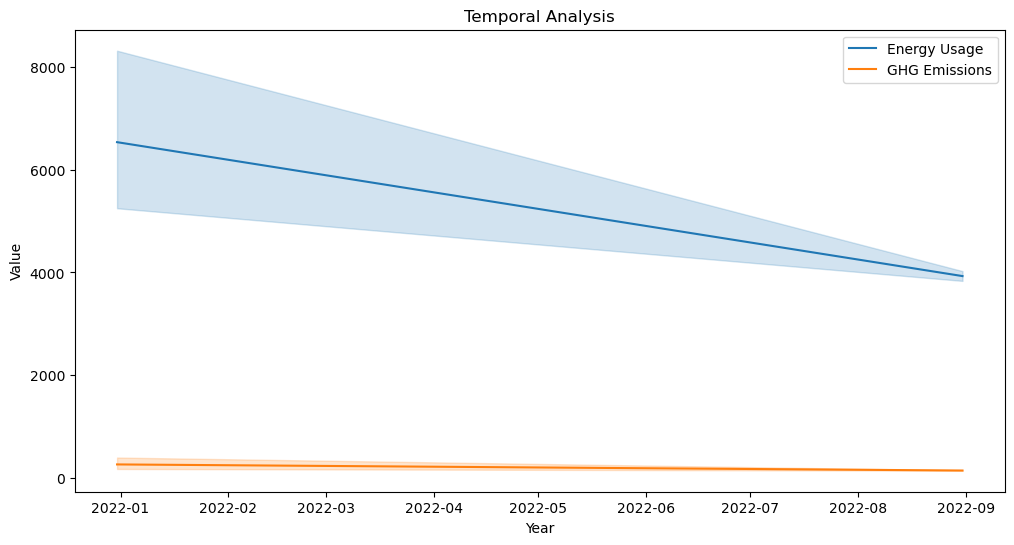

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year Ending', y='Site Energy Use (GJ)', data=df_2, label='Energy Usage')
sns.lineplot(x='Year Ending', y='Total (Location-Based) GHG Emissions (Metric Tons CO2e)', data=df_2, label='GHG Emissions')
plt.title('Temporal Analysis')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

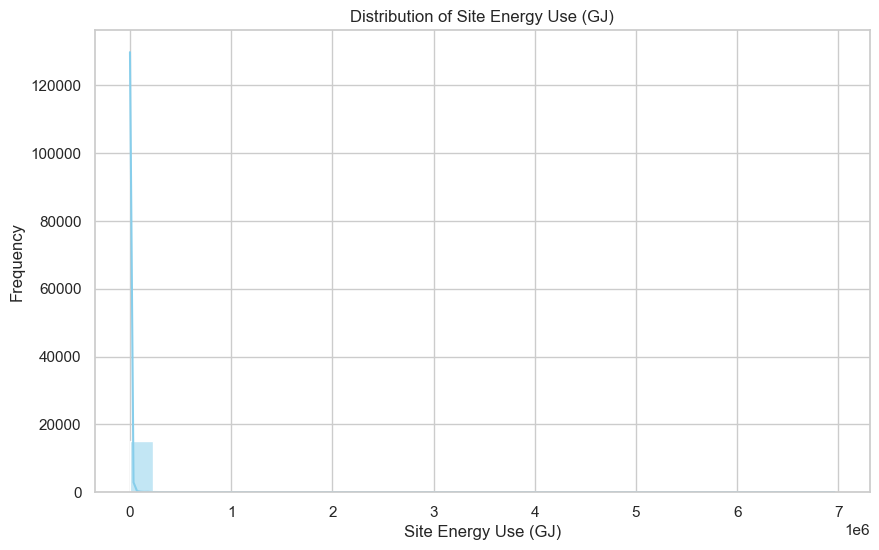

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Visualization 1: Distribution of Site Energy Use
plt.figure(figsize=(10, 6))
sns.histplot(df_2['Site Energy Use (GJ)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Site Energy Use (GJ)')
plt.xlabel('Site Energy Use (GJ)')
plt.ylabel('Frequency')
plt.show()

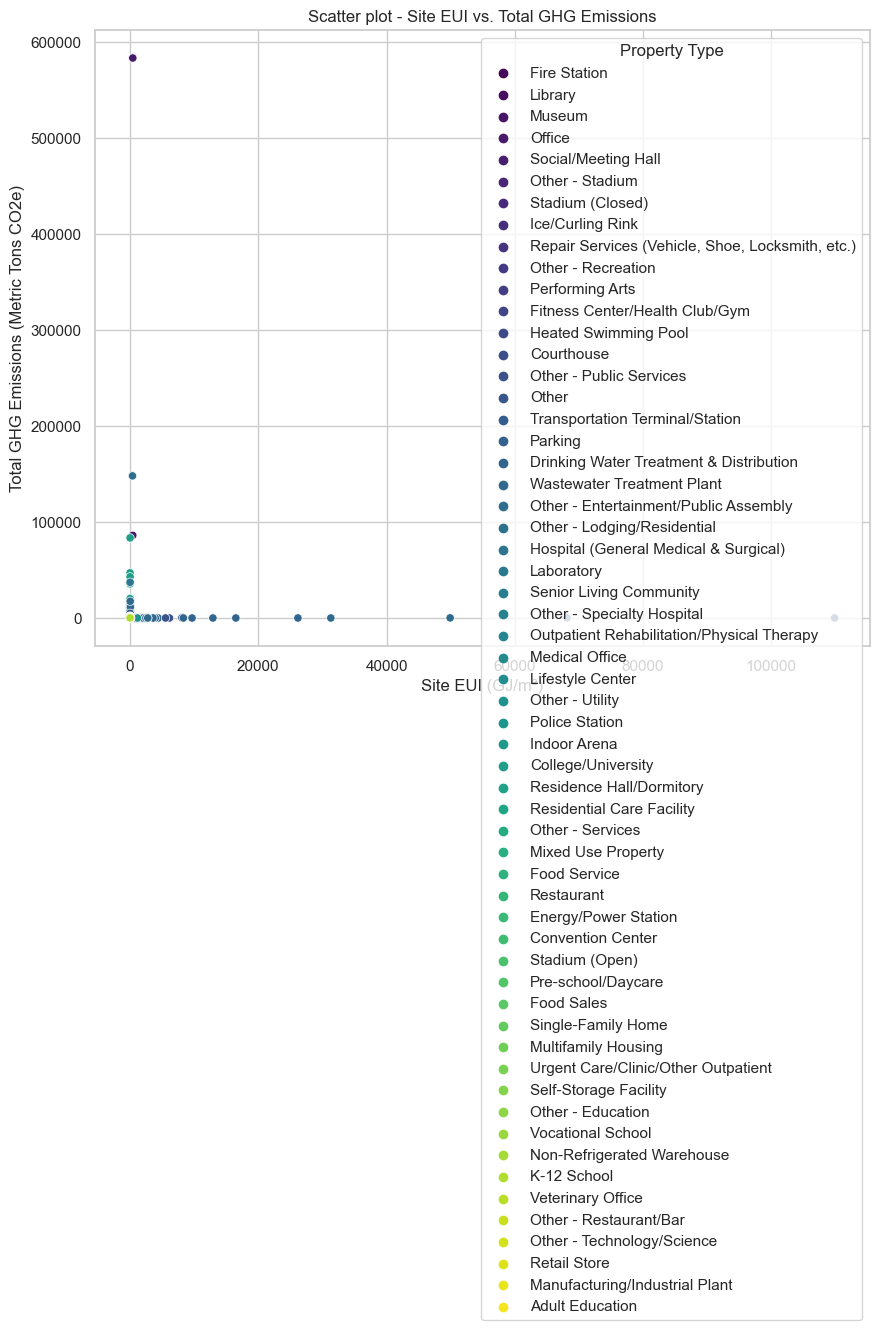

In [26]:
# Visualization 2: Scatter plot - Site EUI vs. Total GHG Emissions
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Site EUI (GJ/m²)', y='Total (Location-Based) GHG Emissions (Metric Tons CO2e)',
                data=df_2, hue='Primary Property Type - Self Selected', palette='viridis')
plt.title('Scatter plot - Site EUI vs. Total GHG Emissions')
plt.xlabel('Site EUI (GJ/m²)')
plt.ylabel('Total GHG Emissions (Metric Tons CO2e)')
plt.legend(title='Property Type')
plt.show()

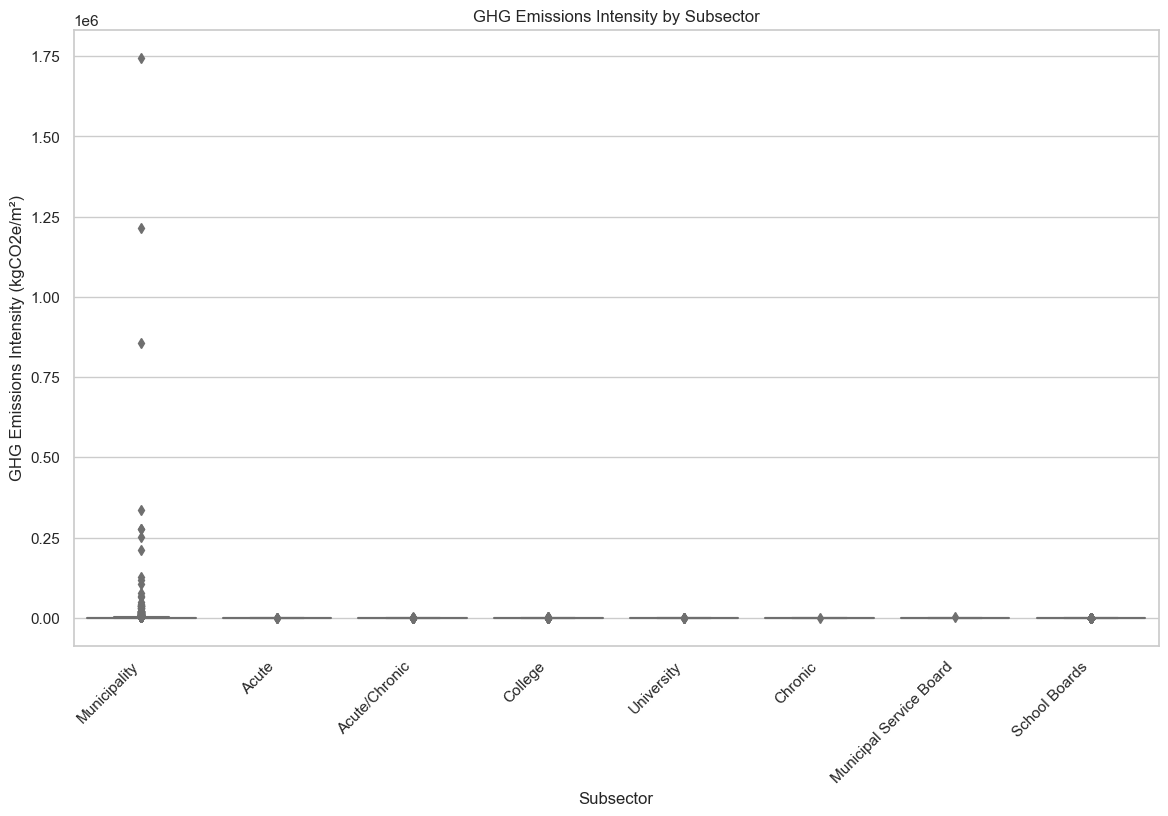

In [27]:
# Visualization 3: Boxplot - GHG Emissions Intensity by Subsector
plt.figure(figsize=(14, 8))
sns.boxplot(x='Subsector', y='Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²)',
            data=df_2, palette='pastel')
plt.title('GHG Emissions Intensity by Subsector')
plt.xlabel('Subsector')
plt.ylabel('GHG Emissions Intensity (kgCO2e/m²)')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


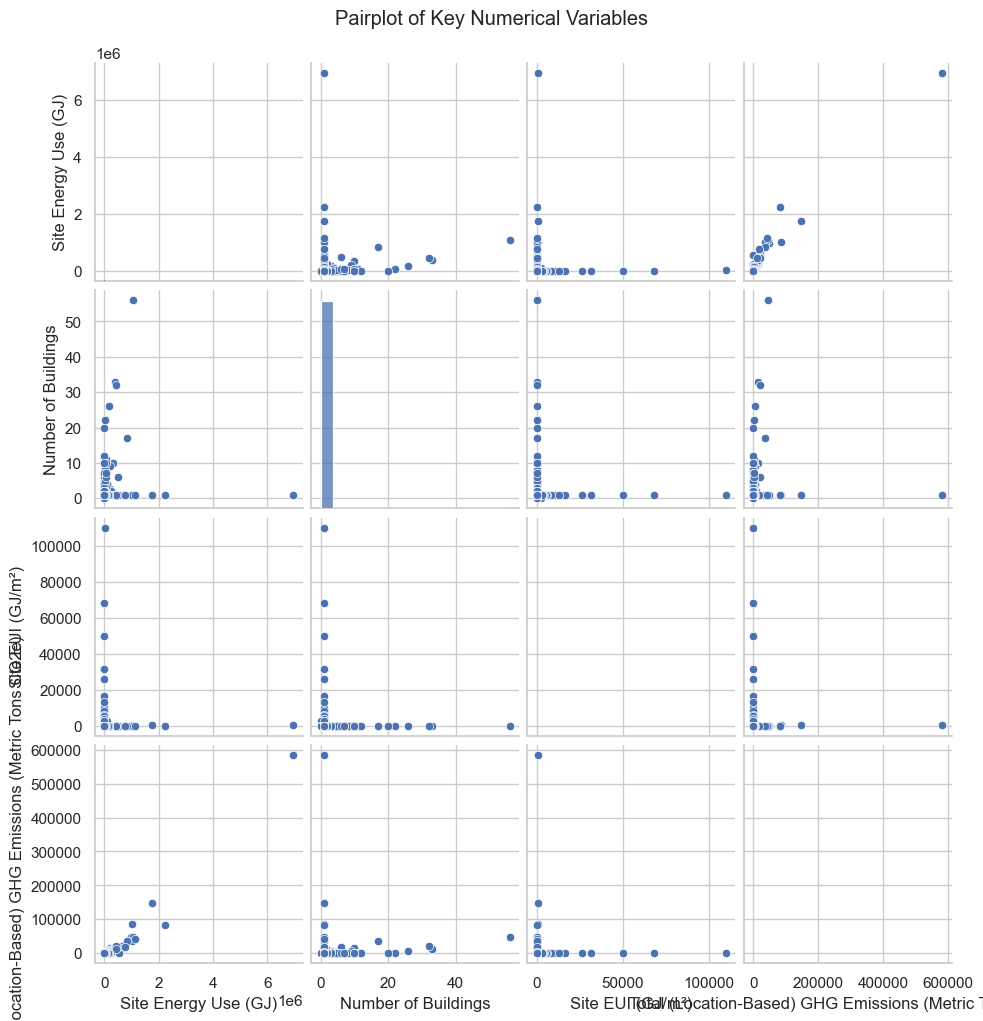

In [28]:
# Visualization 4: Pairplot - Relationship between key numerical variables
numeric_columns = ['Site Energy Use (GJ)', 'Number of Buildings', 'Site EUI (GJ/m²)',
                   'Total (Location-Based) GHG Emissions (Metric Tons CO2e)']

sns.pairplot(df_2[numeric_columns])
plt.suptitle('Pairplot of Key Numerical Variables', y=1.02)
plt.show()


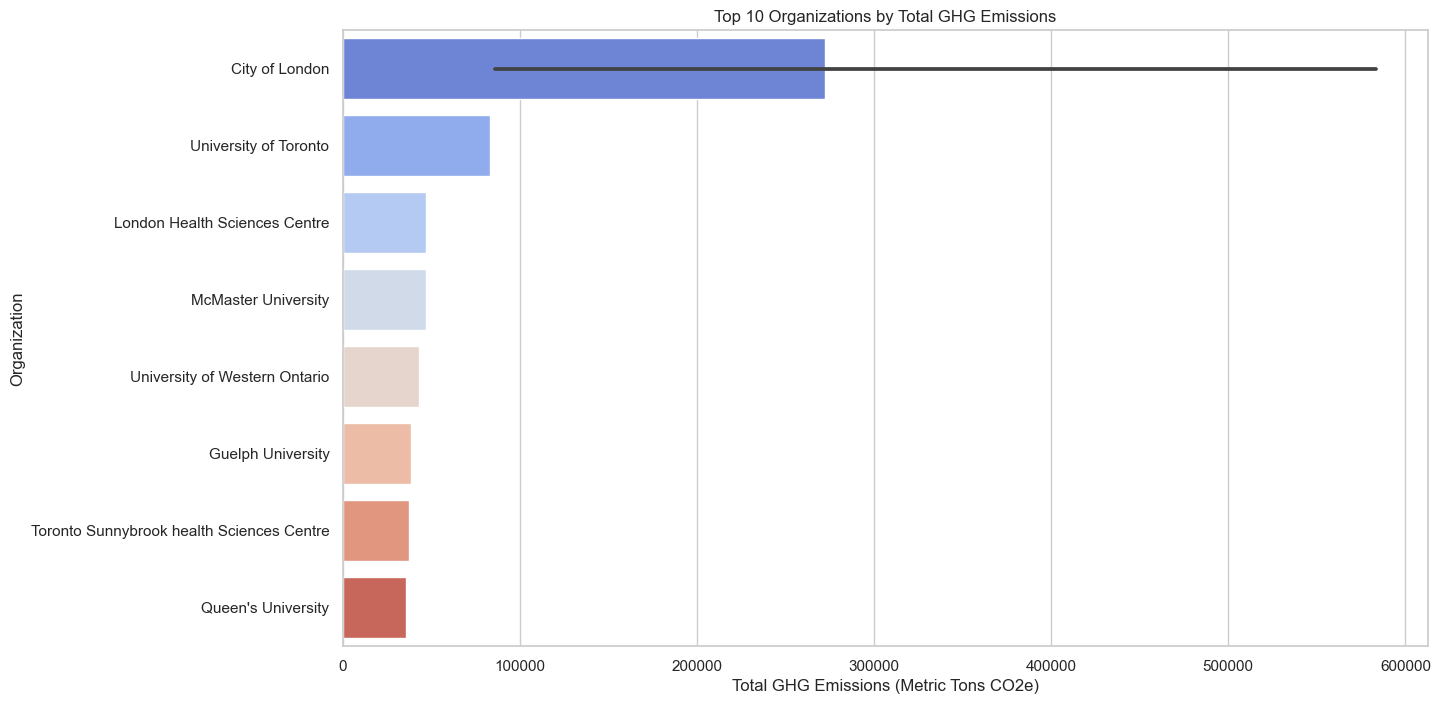

In [29]:
# Visualization 5: Bar plot - Total GHG Emissions by Organization
plt.figure(figsize=(14, 8))
sns.barplot(x='Total (Location-Based) GHG Emissions (Metric Tons CO2e)', y='Organization',
            data=df_2.sort_values('Total (Location-Based) GHG Emissions (Metric Tons CO2e)', ascending=False).head(10),
            palette='coolwarm')
plt.title('Top 10 Organizations by Total GHG Emissions')
plt.xlabel('Total GHG Emissions (Metric Tons CO2e)')
plt.ylabel('Organization')
plt.show()

##7. Statistical Analysis
Problem Statement: Perform a statistical analysis on a given dataset to identify significant trends and correlations. Provide a summary of your findings.
Requirements: sUse statistical methods (e.g., correlation analysis, hypothesis testing).
Present the results using visualizations.
Evaluation Criteria: Correctness of analysis, clarity of summary, and visual presentation.

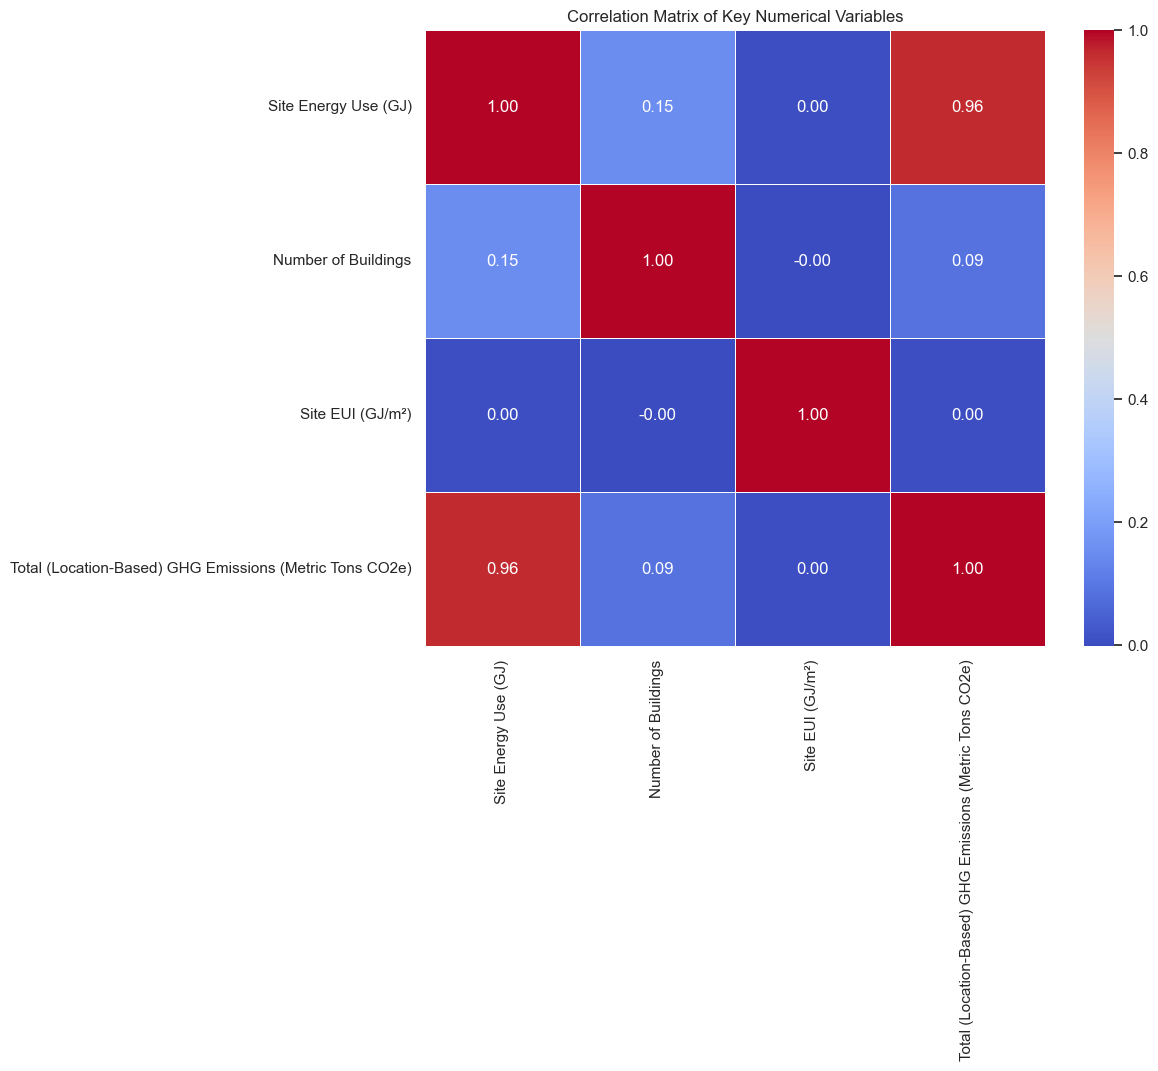

In [30]:
# Visualization 6: Heatmap - Correlation matrix of numerical variables
correlation_matrix = df_2[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Numerical Variables')
plt.show()

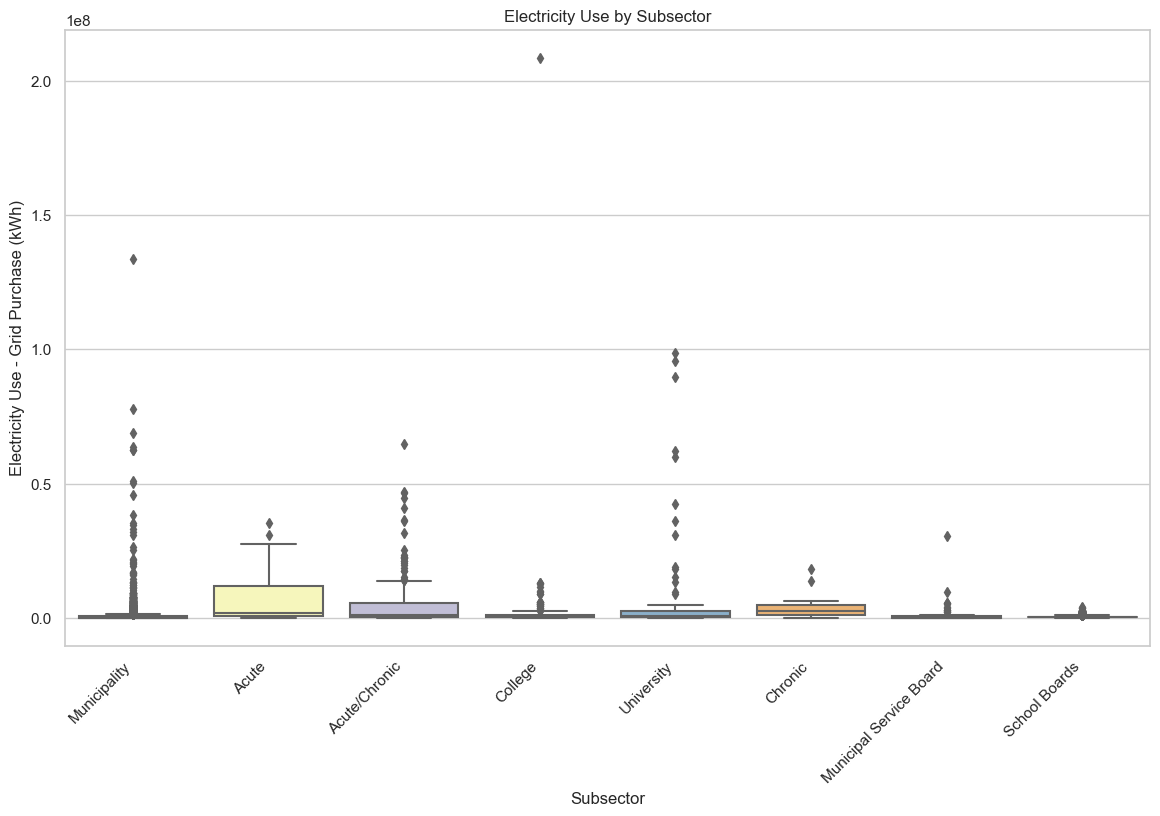

In [31]:
# Visualization 7: Boxplot - Electricity Use by Subsector
plt.figure(figsize=(14, 8))
sns.boxplot(x='Subsector', y='Electricity Use - Grid Purchase (kWh)',
            data=df_2, palette='Set3')
plt.title('Electricity Use by Subsector')
plt.xlabel('Subsector')
plt.ylabel('Electricity Use - Grid Purchase (kWh)')
plt.xticks(rotation=45, ha='right')
plt.show()